# Time Series Forecasting for Retail Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet


Description:
The required libraries are imported for data manipulation, visualization, statistical testing, and time series forecasting. statsmodels is used for ARIMA modeling, while Prophet is used to model trend and seasonality components in the data.

In [2]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\projects\forecasting dataset\train.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")


The historical sales dataset is loaded and the date column is converted to datetime format to enable time-based operations. The data is sorted chronologically to ensure temporal order is maintained for time series analysis.

In [3]:
daily_sales = (
    df.groupby("date", as_index=False)
      .agg({"sales": "sum"})
)


Sales are aggregated at a daily level by summing sales across all stores and items. This aggregation creates a single, continuous time series, simplifying the forecasting problem and making it suitable for baseline demand forecasting.

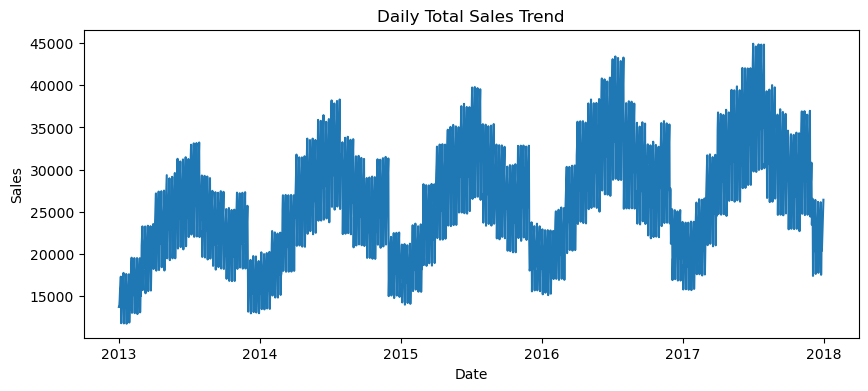

In [4]:
plt.figure(figsize=(10,4))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [5]:
adf_stat, p_value, *_ = adfuller(daily_sales["sales"])
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)


ADF Statistic: -3.0602441187013394
p-value: 0.029638649268844294


The ADF Statistic is sufficiently negative and the p-value is below 0.05, indicating we can reject the null hypothesis.

This means the time series data does not have a unit root and is stationary.

Analytically, the data's properties (mean, variance) are stable over time, making it suitable for modeling with techniques like ARIMA without needing differencing.

In [6]:
arima_model = ARIMA(daily_sales["sales"], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17573.454
Date:                Wed, 31 Dec 2025   AIC                          35152.908
Time:                        01:44:29   BIC                          35169.436
Sample:                             0   HQIC                         35159.005
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2221      0.030      7.304      0.000       0.162       0.282
ma.L1         -0.8960      0.015    -58.941      0.000      -0.926      -0.866
sigma2      1.352e+07   1.17e-09   1.15e+16      0.0

Model shows significance but has serious flaws — The AR and MA terms are statistically significant (p=0.000), suggesting the model structure captures some pattern in the sales data.

Residuals violate key assumptions — The Jarque-Bera test (p=0.00) indicates non-normal residuals, and the heteroskedasticity test (p=0.00) shows changing variance, undermining statistical reliability.

Numerical instability present — The near-singular covariance matrix warning suggests potential multicollinearity or identification problems, making coefficient estimates potentially unreliable.

Forecasts usable but uncertain — While the model may produce reasonable point forecasts, confidence intervals and hypothesis tests should be treated with caution due to these diagnostic issues.

Model refinement needed — Before deployment, I should address residual patterns, consider transformations, or explore alternative specifications to improve model validity.



In [7]:
arima_forecast = arima_result.forecast(steps=30)
arima_forecast


1826    23903.221937
1827    23344.249357
1828    23220.102396
1829    23192.529545
1830    23186.405657
1831    23185.045551
1832    23184.743473
1833    23184.676382
1834    23184.661482
1835    23184.658172
1836    23184.657437
1837    23184.657274
1838    23184.657238
1839    23184.657229
1840    23184.657228
1841    23184.657227
1842    23184.657227
1843    23184.657227
1844    23184.657227
1845    23184.657227
1846    23184.657227
1847    23184.657227
1848    23184.657227
1849    23184.657227
1850    23184.657227
1851    23184.657227
1852    23184.657227
1853    23184.657227
1854    23184.657227
1855    23184.657227
Name: predicted_mean, dtype: float64

In [8]:
prophet_df = daily_sales.rename(
    columns={"date": "ds", "sales": "y"}
)


In [9]:
prophet_model = Prophet()
prophet_model.fit(prophet_df)


01:55:03 - cmdstanpy - INFO - Chain [1] start processing
01:55:05 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)


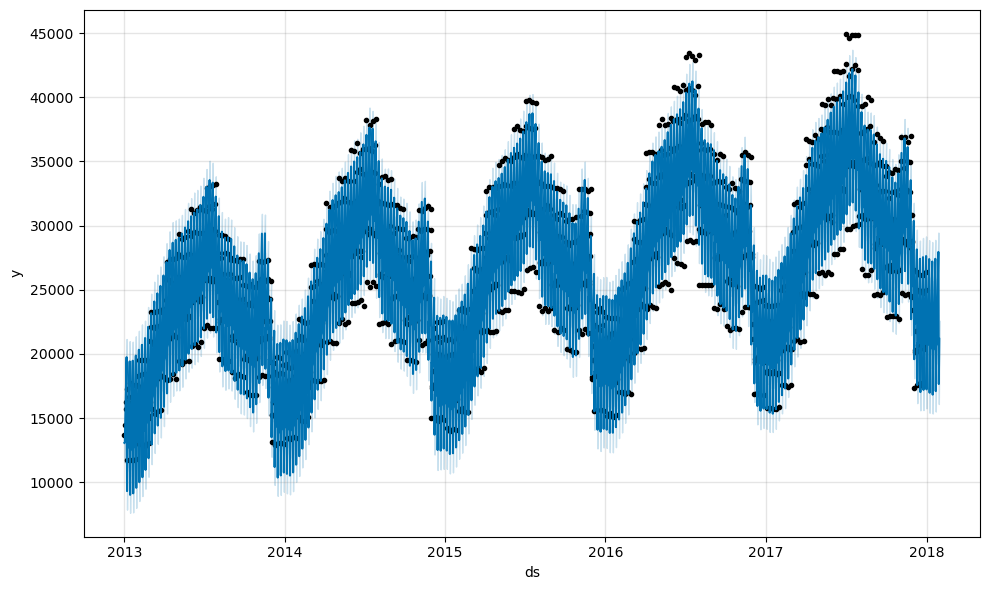

In [11]:
prophet_model.plot(forecast)
plt.show()


Outcomes and Future Scope

This analysis demonstrates the application of time series forecasting techniques to retail sales data using Python. By aggregating historical sales at a daily level and applying ARIMA and Prophet models, the project establishes a baseline approach for understanding demand patterns and generating short-term forecasts.

The models capture overall trend and seasonal behavior in the data, providing directional insights into expected sales movement. However, due to the aggregated nature of the data and the absence of external influencing factors such as promotions, holidays, or pricing changes, the forecasts are best interpreted as indicative rather than precise point estimates.

From a business perspective, these outputs can support short-term planning activities such as inventory allocation, demand estimation, and operational scheduling. At the same time, the analysis highlights the limitations of relying solely on historical sales patterns for forecasting in dynamic retail environments.

Future improvements could include evaluating model performance using formal error metrics, building forecasts at a store or item level, and incorporating exogenous variables to better account for real-world factors affecting demand. These enhancements would help improve forecast accuracy and make the models more suitable for decision-critical use cases.